In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [282]:
import io
%cd "D:\Data Science\Python\Forecast Green Energy - jobathon"

D:\Data Science\Python\Forecast Green Energy - jobathon


In [283]:
energy_train=pd.read_csv('train_IxoE5JN.csv')

In [284]:
energy_test=pd.read_csv('test_WudNWDM.csv')

In [285]:
print(energy_train.shape)
print(energy_test.shape)

(94992, 3)
(26304, 2)


In [286]:
energy_train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [287]:
energy_test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [288]:
energy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [289]:
energy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26304 non-null  int64 
 1   datetime  26304 non-null  object
dtypes: int64(1), object(1)
memory usage: 411.1+ KB


In [290]:
energy_train.datetime=pd.to_datetime(energy_train.datetime, errors="coerce")
energy_test.datetime=pd.to_datetime(energy_test.datetime, errors="coerce")

In [291]:
energy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [292]:
energy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 411.1 KB


In [293]:
energy_train=energy_train.drop(['row_id'],axis=1)

In [294]:
energy_test=energy_test.drop(['row_id'],axis=1)

In [295]:
energy_train=energy_train.set_index('datetime')

In [296]:
energy_train.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


In [297]:
energy_test=energy_test.set_index('datetime')

In [298]:
energy_test.head()

""
datetime
2019-01-01 00:00:00
2019-01-01 01:00:00
2019-01-01 02:00:00
2019-01-01 03:00:00
2019-01-01 04:00:00


In [299]:
energy_train.isnull().sum()

energy    1900
dtype: int64

In [300]:
energy_train_imputed=energy_train.fillna(method='ffill')

In [301]:
energy_train_imputed.isnull().sum()

energy    0
dtype: int64

<AxesSubplot:xlabel='datetime'>

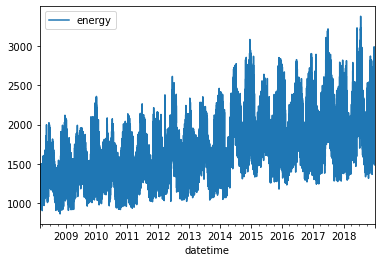

In [302]:
energy_train_imputed.plot(kind='line')

In [303]:
# Augmented Dickey Fuller test of Stationarity
# Null - Unit root present or data is not stationary
# Alt - No unit Root or Data is Stationary
from statsmodels.tsa.stattools import adfuller

In [304]:
adfuller(energy_train_imputed)
#Since p-value=1.8057242790627683e-15 is less than 0.05, Reject Null - Data is Stationary

(-9.218570739447443,
 1.8057242790627683e-15,
 67,
 94924,
 {'1%': -3.4304188917117377,
  '5%': -2.8615704490393217,
  '10%': -2.5667862069612752},
 894318.9282902289)

In [305]:
from statsmodels.tsa.seasonal import seasonal_decompose

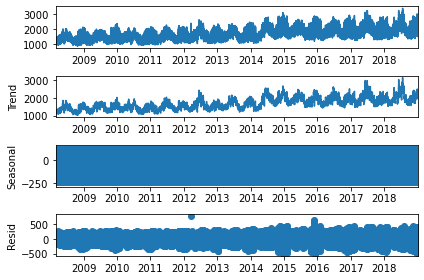

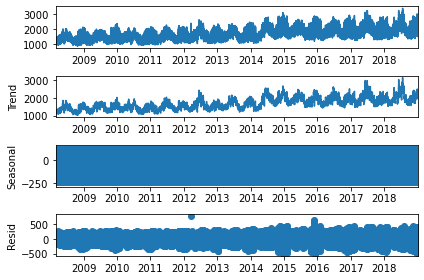

In [306]:
seasonal_decompose(energy_train_imputed).plot()

In [307]:
# Arima causing memory error

In [308]:
energy_train_imputed.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


In [309]:
energy_train_imputed=energy_train_imputed.reset_index()
energy_test=energy_test.reset_index()

In [310]:
energy_train_imputed.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [311]:
energy_train_imputed.columns=['ds','y']
energy_test.columns=['ds']

In [312]:
energy_train_imputed.head()

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [313]:
energy_test.head()

,ds
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00


In [314]:
from prophet import Prophet

In [315]:
m=Prophet()

In [316]:
m.fit(energy_train_imputed)

18:42:49 - cmdstanpy - INFO - Chain [1] start processing
18:45:07 - cmdstanpy - INFO - Chain [1] done processing


In [317]:
forecast=m.predict(energy_test)

In [318]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26299,2021-12-31 19:00:00,2563.448142,364.654846,4914.706670
26300,2021-12-31 20:00:00,2576.594882,340.664265,4935.548038
26301,2021-12-31 21:00:00,2561.483319,369.497415,4879.978529
26302,2021-12-31 22:00:00,2509.228175,302.801843,4770.486752
26303,2021-12-31 23:00:00,2427.412133,201.012684,4725.866108


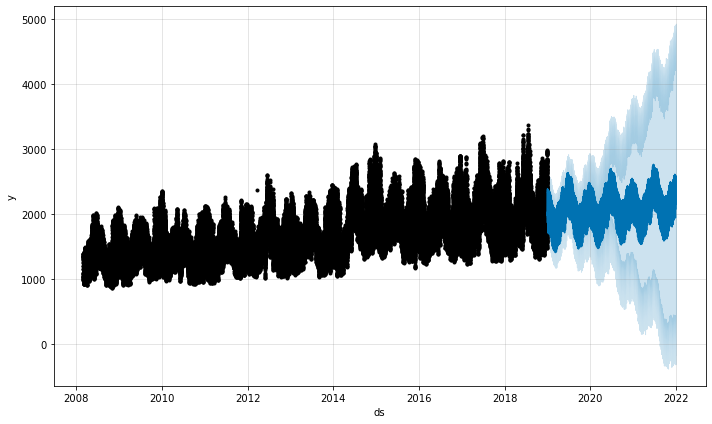

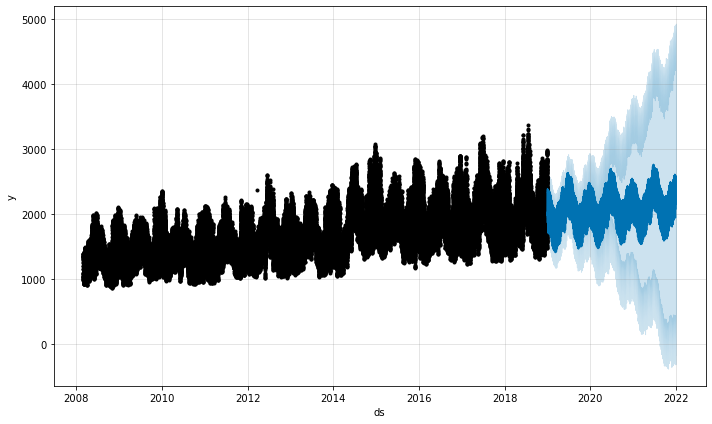

In [319]:
m.plot(forecast)

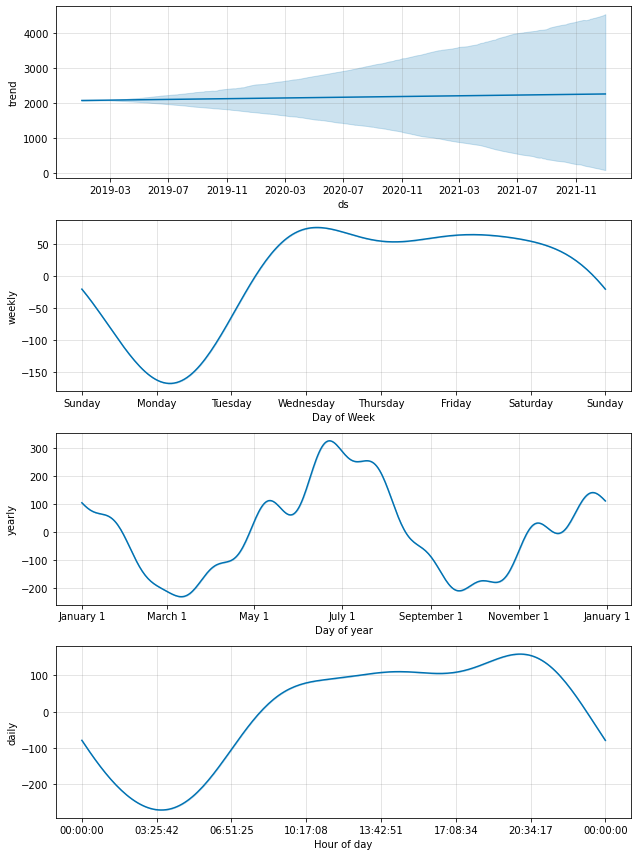

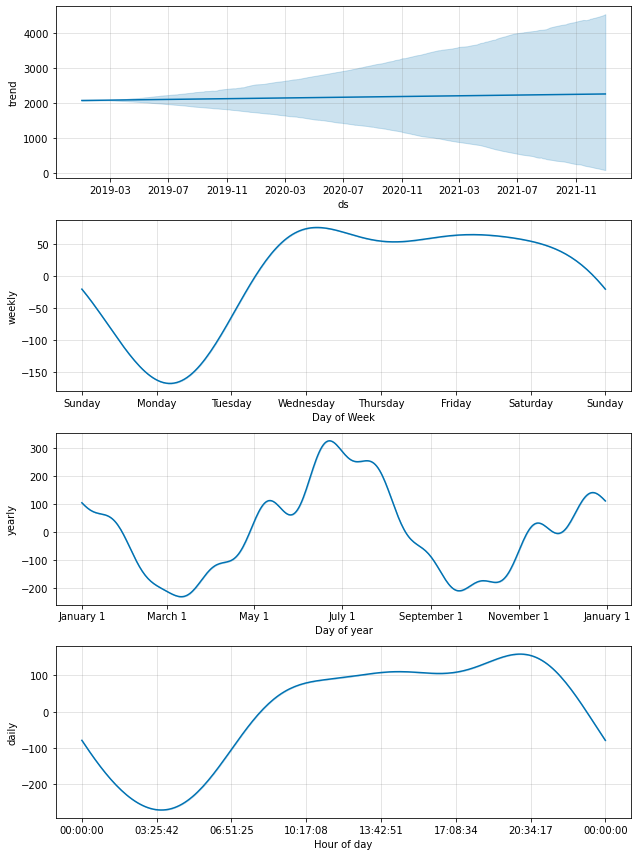

In [320]:
m.plot_components(forecast)

In [322]:
pd.DataFrame(forecast).to_csv('prophet_ff.csv')

### Multi-variate Time Series Analysis

In [323]:
energy_train_imputed.columns=['datetime','energy']
energy_train_imputed.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [324]:
energy_test.columns=['datetime']
energy_test.head()

,datetime
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00


In [325]:
energy_test['energy']='test'

In [326]:
combinedf=pd.concat([energy_train_imputed,energy_test],axis=0)

In [327]:
combinedf.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.5415
2,2008-03-01 02:00:00,1056.2475
3,2008-03-01 03:00:00,1034.742
4,2008-03-01 04:00:00,1026.3345


In [328]:
combinedf.tail()

,datetime,energy
26299,2021-12-31 19:00:00,test
26300,2021-12-31 20:00:00,test
26301,2021-12-31 21:00:00,test
26302,2021-12-31 22:00:00,test
26303,2021-12-31 23:00:00,test


In [329]:
#extract variables from datetime

In [330]:
combinedf['day']=combinedf.datetime.dt.day

In [331]:
combinedf['dayofweek']=combinedf.datetime.dt.dayofweek

In [332]:
combinedf['dayofyear']=combinedf.datetime.dt.dayofyear

In [333]:
combinedf['hour']=combinedf.datetime.dt.hour

In [334]:
combinedf['month']=combinedf.datetime.dt.month

In [335]:
combinedf['quarter']=combinedf.datetime.dt.quarter

In [336]:
combinedf['week']=combinedf.datetime.dt.week

C:\Users\vikram\AppData\Local\Temp\ipykernel_18416\3478502758.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  combinedf['week']=combinedf.datetime.dt.week


In [337]:
combinedf['weekday']=combinedf.datetime.dt.weekday

In [338]:
combinedf['weekofyear']=combinedf.datetime.dt.weekofyear

C:\Users\vikram\AppData\Local\Temp\ipykernel_18416\3611308144.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  combinedf['weekofyear']=combinedf.datetime.dt.weekofyear


In [339]:
combinedf['year']=combinedf.datetime.dt.year

In [340]:
combinedf.head()

,datetime,energy,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,2008-03-01 00:00:00,1259.985563,1,5,61,0,3,1,9,5,9,2008
1,2008-03-01 01:00:00,1095.5415,1,5,61,1,3,1,9,5,9,2008
2,2008-03-01 02:00:00,1056.2475,1,5,61,2,3,1,9,5,9,2008
3,2008-03-01 03:00:00,1034.742,1,5,61,3,3,1,9,5,9,2008
4,2008-03-01 04:00:00,1026.3345,1,5,61,4,3,1,9,5,9,2008


In [341]:
combinedf.dtypes

datetime      datetime64[ns]
energy                object
day                    int64
dayofweek              int64
dayofyear              int64
hour                   int64
month                  int64
quarter                int64
week                   int64
weekday                int64
weekofyear             int64
year                   int64
dtype: object

In [349]:
energy_train_mv=combinedf[combinedf.energy!='test']
energy_test_mv=combinedf[combinedf.energy=='test']

In [350]:
energy_train_mv.head()

,datetime,energy,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,2008-03-01 00:00:00,1259.985563,1,5,61,0,3,1,9,5,9,2008
1,2008-03-01 01:00:00,1095.5415,1,5,61,1,3,1,9,5,9,2008
2,2008-03-01 02:00:00,1056.2475,1,5,61,2,3,1,9,5,9,2008
3,2008-03-01 03:00:00,1034.742,1,5,61,3,3,1,9,5,9,2008
4,2008-03-01 04:00:00,1026.3345,1,5,61,4,3,1,9,5,9,2008


In [351]:
energy_train_mv.tail()

,datetime,energy,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
94987,2018-12-31 19:00:00,2528.4468,31,0,365,19,12,4,1,0,1,2018
94988,2018-12-31 20:00:00,2461.8836,31,0,365,20,12,4,1,0,1,2018
94989,2018-12-31 21:00:00,2365.9944,31,0,365,21,12,4,1,0,1,2018
94990,2018-12-31 22:00:00,2342.9428,31,0,365,22,12,4,1,0,1,2018
94991,2018-12-31 23:00:00,2180.2176,31,0,365,23,12,4,1,0,1,2018


In [352]:
energy_test_mv.head()

,datetime,energy,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,2019-01-01 00:00:00,test,1,1,1,0,1,1,1,1,1,2019
1,2019-01-01 01:00:00,test,1,1,1,1,1,1,1,1,1,2019
2,2019-01-01 02:00:00,test,1,1,1,2,1,1,1,1,1,2019
3,2019-01-01 03:00:00,test,1,1,1,3,1,1,1,1,1,2019
4,2019-01-01 04:00:00,test,1,1,1,4,1,1,1,1,1,2019


In [353]:
energy_test_mv.tail()

,datetime,energy,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
26299,2021-12-31 19:00:00,test,31,4,365,19,12,4,52,4,52,2021
26300,2021-12-31 20:00:00,test,31,4,365,20,12,4,52,4,52,2021
26301,2021-12-31 21:00:00,test,31,4,365,21,12,4,52,4,52,2021
26302,2021-12-31 22:00:00,test,31,4,365,22,12,4,52,4,52,2021
26303,2021-12-31 23:00:00,test,31,4,365,23,12,4,52,4,52,2021


In [354]:
energy_test_mv=energy_test_mv.drop(['energy','datetime'],axis=1)

In [355]:
energy_test_mv.head()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,1,1,1,0,1,1,1,1,1,2019
1,1,1,1,1,1,1,1,1,1,2019
2,1,1,1,2,1,1,1,1,1,2019
3,1,1,1,3,1,1,1,1,1,2019
4,1,1,1,4,1,1,1,1,1,2019


In [356]:
energy_train_mv=energy_train_mv.drop('datetime',axis=1)

In [357]:
energy_train_mv.head()

,energy,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year
0,1259.985563,1,5,61,0,3,1,9,5,9,2008
1,1095.5415,1,5,61,1,3,1,9,5,9,2008
2,1056.2475,1,5,61,2,3,1,9,5,9,2008
3,1034.742,1,5,61,3,3,1,9,5,9,2008
4,1026.3345,1,5,61,4,3,1,9,5,9,2008


In [361]:
energy_train_mv.dtypes

energy        float64
day             int64
dayofweek       int64
dayofyear       int64
hour            int64
month           int64
quarter         int64
week            int64
weekday         int64
weekofyear      int64
year            int64
dtype: object

In [360]:
energy_train_mv.energy=energy_train_mv.energy.astype('float64')

In [362]:
y=energy_train_mv.energy
X=energy_train_mv.drop('energy',axis=1)

In [365]:
from sklearn.linear_model import LinearRegression

In [366]:
reg=LinearRegression()

In [368]:
regmodel=reg.fit(X,y)

In [369]:
regmodel.score(X,y)

0.48759404400512885

In [370]:
regpredict=regmodel.predict(energy_test_mv)

In [371]:
pd.DataFrame(regpredict).to_csv('reg.csv')

In [372]:
from sklearn.tree import DecisionTreeRegressor

In [388]:
tree=DecisionTreeRegressor(max_depth=12)

In [389]:
treemodel=tree.fit(X,y)

In [390]:
treemodel.score(X,y)

0.9107031017152549

In [391]:
treepredict=treemodel.predict(energy_test_mv)

In [393]:
pd.DataFrame(treepredict).to_csv('tree.csv')

In [394]:
from sklearn.ensemble import RandomForestRegressor

In [395]:
rf=RandomForestRegressor(n_estimators=2000,max_depth=12)

In [396]:
rfmodel=rf.fit(X,y)

In [399]:
rfmodel.score(X,y)

0.9285986371501638

In [397]:
rfpredict=rfmodel.predict(energy_test_mv)

In [398]:
pd.DataFrame(rfpredict).to_csv('rf.csv')

In [400]:
from sklearn.ensemble import GradientBoostingRegressor

In [406]:
gbm=GradientBoostingRegressor(n_estimators=2000,max_depth=6)

In [407]:
gbmmodel=gbm.fit(X,y)

In [408]:
gbmmodel.score(X,y)

0.9919034978448975

In [409]:
gbmpredict=gbmmodel.predict(energy_test_mv)

In [411]:
pd.DataFrame(gbmpredict).to_csv('gbm1.csv')

In [412]:
from xgboost import XGBRegressor

In [413]:
xgb=XGBRegressor()

In [414]:
xgbmodel=xgb.fit(X,y)

In [415]:
xgbmodel.score(X,y)

0.9554088860272442

In [416]:
xgbpredict=xgbmodel.predict(energy_test_mv)

In [417]:
pd.DataFrame(xgbpredict).to_csv('xgb.csv')

In [418]:
from sklearn.neighbors import KNeighborsRegressor

In [419]:
knn=KNeighborsRegressor()

In [420]:
knnmodel=knn.fit(X,y)

In [421]:
knnmodel.score(X,y)

0.9425096280630494

In [422]:
knnpredict=knnmodel.predict(energy_test_mv)

In [423]:
pd.DataFrame(knnpredict).to_csv('knn.csv')

In [425]:
from sklearn.neural_network import MLPRegressor

In [426]:
nn=MLPRegressor(hidden_layer_sizes=(100,50,20))

In [427]:
nnmodel=nn.fit(X,y)

In [428]:
nnmodel.score(X,y)

0.4199712003002345

In [429]:
nnpredict=nnmodel.predict(energy_test_mv)